<a href="https://colab.research.google.com/github/maulidyasyif/Prediksi-Kualitas-Anggur/blob/main/kualitasanggur_042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Data Mining: Prediksi Kualitas Anggur**

---


**Konteks**

Dataset yang digunakan dalam proyek ini adalah dataset Wine Quality, yang berisi data mengenai fitur-fitur kimiawi dari anggur merah dan putih serta nilai kualitasnya. Setiap sampel anggur memiliki sejumlah variabel kimia seperti kadar asam, gula, pH, alkohol, dan komponen lainnya yang mempengaruhi mutu anggur. Variabel target yang akan diprediksi adalah quality, yang menunjukkan kualitas anggur dari skala 0 hingga 10.



Tugas pada proyek ini adalah membuat model klasifikasi yang dapat memprediksi kualitas anggur berdasarkan fitur-fitur kimiawi yang tersedia. Model dikembangkan dengan menggunakan data training yang telah dilengkapi label quality, kemudian hasilnya diterapkan untuk memprediksi nilai quality pada data testing yang tidak memiliki label. Selain itu, proses analisis juga mencakup beberapa tahapan sepetri pembersihan data (data cleaning), pengecekan nilai hilang, pemeriksaan skala fitur, serta evaluasi model menggunakan matriks akurasi dan confusion matriks.

**Data Understanding**

In [184]:
#import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
#muat dataset training
df_train = pd.read_csv('data_training.csv')

#cek struktur data training
print("Info Dataset Training:")
print(df_train.info())

Info Dataset Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
None


Data tersebut merupakan dataset Wine Quality, yang berisi data mengenai fitur-fitur kimiawi dari anggur merah dan putih serta nilai kualitas (quality) dari setiap sampel anggur.

Berikut adalah variabel-variabel yang terdapat dalam dataset:
1. fixed acidity : kadar asam tetap pada anggur
2. volatile acidity : kadar asam mudah menguap
3. citric acid : 	Kadar asam sitrat
4. residual sugar : 	Sisa gula setelah fermentasi
5. chlorides : kadar garam (NaCl) dalam anggur
6. free sulfur dioxide : jumlah sulfur bebas untuk mencegah pembusukan
7. total sulfur dioxide : 	total kandungan sulfur dioksida
8. density : tingkat kepadatan cairan anggur
9. pH : tingkat keasaman anggur
10. sulphates : kadar sulfat
11. alcohol : persentase kadar alkohol
12. quality : target, nilai kualitas anggur (skala 0–10)

Setiap baris dalam dataset merepresentasikan satu sampel anggur, sedangkan setiap kolom menggambarkan atribut kimia tertentu yang memengaruhi kualitasnya, kecuali kolom id (identitas data, tidak digunakan sebagai fitur dalam pemodelan (X)).

Berikut adalah dataset training:

In [186]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


In [187]:
#muat dataset test
df_test = pd.read_csv('data_testing.csv')

#cek struktur data testing
print("\nInfo Dataset Testing:")
print(df_test.info())


Info Dataset Testing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
 11  Id                    286 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 26.9 KB
None


Dataset testing memiliki struktur dan variabel yang sama seperti dataset training, yaitu berisi fitur-fitur kimiawi dari sampel anggur seperti fixed acidity, volatile acidity, alkohol, dan lain-lain.

Perbedaannya adalah pada dataset ini tidak terdapat kolom quality karena kolom tersebut menjadi target yang akan diprediksi. Setiap baris tetap merepresentasikan satu sampel anggur, sementara kolom-kolom lainnya menggambarkan karakteristik kimiawi yang menjadi input (X) untuk model klasifikasi atau prediksi kualitas anggur.

Berikut dataset dari testing:

In [188]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


**Tahapan Data Understanding and Cleaning**

Pada tahapan ini, dilakukan data understanding dan cleaning data terhadap dataset training dan testing sebelum pemodelan. Tahapannya sebagai berikut:

1. Menampilkan informasi dataset training dan testing, seperti jumlah baris, kolom, dan tipe data.
2. Mengecek missing values dataset kemudian mengatasinya.
3. Mengecek duplikasi pada data training dan testing, kemudian hapus jika ada.
4. Melihat statistik deskriptif untuk memahami distribusi dan sebaran data pada fitur.
5. Mengecek apakah fitur memerlukan normalisasi atau scaling, lalu lakukan scaling jika diperlukan.
6. Menghitung matriks korelasi antar fitur untuk mengetahui hubungan antar variabel.
7. Membangun beberapa model klasifikasi
8. Mengevaluasi model menggunakan akurasi kemudian memilih model dengan performa terbaik untuk pelatihan data.
9. Melatih model terpilih pada dataset training dan menyimpan model yang sudah dilatih.
10. Menggunakan model terlatih untuk memprediksi quality pada data testing, lalu menyimpan hasilnya.



In [189]:
#informasi dataset
df_train = pd.read_csv('data_training.csv')
print("Struktur data training:")
print(df_train.head())
print(df_train.info())
print(f"Jumlah baris data training: {df_train.shape[0]}, Jumlah kolom: {df_train.shape[1]}")

df_test = pd.read_csv('data_testing.csv')
print("\nStruktur data testing:")
print(df_test.head())
print(df_test.info())
print(f"Jumlah baris data testing: {df_test.shape[0]}, Jumlah kolom: {df_test.shape[1]}")

#pisahkan X dan target (y) untuk training, fitur: semua kolom kecuali 'quality' dan 'Id'
X_train = df_train.drop(columns=['quality', 'Id'])
y_train = df_train['quality']

#untuk testing, hanya fitur (tanpa quality)
X_test = df_test.drop(columns=['Id'])
test_ids = df_test['Id']  #simpan Id buat file output

print("\nFitur training (X_train):")
print(X_train.head())
print("\nTarget training (y_train):")
print(y_train.head())

Struktur data training:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0      9.8        5  1366  
1     

Pada dataset training memiliki 857 baris dan 13 kolom yang terdiri dari 11 variabel tipe float dan 2 variabel tipe integer. Kolom Non-Null Count menunjukkan bahwa seluruh variabel memiliki 857 nilai non-null, yang berarti tidak ada nilai kosong dalam dataset ini.


Sedangkan unutk dataset test memiliki 286 baris dan 12 kolom yang terdiri dari 11 variabel tipe float dan 1 variabel tipe integer. Kolom Non-Null Count menunjukkan bahwa seluruh variabel memiliki 286 nilai non-null, yang berarti tidak ada nilai kosong dalam dataset ini.


Kemudian dataset training dibagi menjadi dua bagian utama, yaitu fitur (X) dan target (y). Fitur berisi semua informasi tentang sifat kimia dari wine, seperti kadar asam, gula, pH, dan alkohol yang bisa memengaruhi kualitas wine. Sedangkan target (quality) adalah nilai kualitas wine yang akan diprediksi oleh model. Kolom Id tidak digunakan karena hanya sebagai penanda data, bukan informasi yang berpengaruh pada kualitas. Jadi, langkah ini dilakukan agar model bisa fokus belajar hubungan antara sifat-sifat kimia wine (X) dengan nilai kualitasnya (y).


In [190]:
#cek missing values
print("Missing values di training:")
print(X_train.isnull().sum())
print("\nMissing values di testing:")
print(X_test.isnull().sum())

Missing values di training:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Missing values di testing:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


Pada dataset training maupun testing, tidak ditemukan missing value atau data yang kosong. Artinya, setiap kolom sudah terisi lengkap tanpa ada nilai yang hilang. Jadi, tidak diperlukan penghapusan data karena semua data lengkap.

Selanjutnya adalah mengecek duplikat pada dataset untuk memastikan tidak ada data yang muncul lebih dari sekali dan mengidentifikasi deskripsi dari masing-masing dataset.

In [191]:
#cek duplikat pada dataset training dan testing
duplicate_rows = df_train[df_train.duplicated()]
print(f"Jumlah data duplikat data train: {duplicate_rows.shape[0]}")
duplicate_rows_test = df_test[df_test.duplicated()]
print(f"Jumlah data duplikat data test: {duplicate_rows_test.shape[0]}")

Jumlah data duplikat data train: 0
Jumlah data duplikat data test: 0


Hasilnya tidak ditemukan data yang duplikat, jadi semua data bisa langsung dipakai untuk tahap analisis selanjutnya.

In [192]:
#cek statistik deskriptif untuk melihat variasi fitur
print("\nStatistik deskriptif training:")
display(df_train.describe())

# dataset testing
print("\nStatistik deskriptif Testing")
display(df_test.describe())


Statistik deskriptif training:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000



Statistik deskriptif Testing


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,8.458392,0.537168,0.271399,2.609965,0.087241,15.113636,45.723776,0.996846,3.304790,0.660699,10.477389,778.660839
std,1.873036,0.181229,0.201552,1.527564,0.042696,10.100644,35.909202,0.001994,0.169794,0.179456,1.127771,464.383455
min,5.000000,0.180000,0.000000,1.200000,0.034000,3.000000,7.000000,0.990840,2.860000,0.330000,8.400000,2.000000
25%,7.100000,0.392500,0.090000,1.900000,0.071000,7.000000,21.000000,0.995605,3.200000,0.560000,9.600000,402.250000
50%,8.000000,0.530000,0.250000,2.200000,0.081000,12.000000,35.000000,0.996760,3.295000,0.620000,10.200000,747.000000
75%,9.400000,0.650000,0.427500,2.700000,0.091000,21.000000,55.750000,0.998100,3.400000,0.720000,11.175000,1169.500000
max,15.900000,1.330000,0.760000,15.400000,0.415000,68.000000,289.000000,1.003690,4.010000,1.950000,14.900000,1590.000000


Berdasarkan hasil analisis deskriptif, data training memiliki rata-rata fixed acidity sebesar 8.26 dan volatile acidity 0.53, menunjukkan tingkat keasaman yang sedang. Nilai rata-rata residual sugar sebesar 2.51 menandakan rasa wine cenderung agak manis, sedangkan kadar garam (chlorides) sebesar 0.087 masih tergolong rendah. Kandungan free sulfur dioxide dan total sulfur dioxide masing-masing 15.78 dan 45.98 menunjukkan kadar pengawet yang aman. Rata-rata density 0.9967 dan pH 3.31 menandakan karakteristik fisik yang normal, sementara kadar alcohol sebesar 10.43% dan nilai quality rata-rata 5.65 menunjukkan bahwa sebagian besar wine berkualitas menengah.

Pada data testing, hasilnya hampir sama dimana rata-rata fixed acidity 8.46, residual sugar 2.61, chlorides 0.087, pH 3.30, density 0.9968, dan alcohol 10.48%. Dengan demikian, kedua data menunjukkan karakteristik yang konsisten dan dapat digunakan dalam proses pemodelan.


**Pengecekan Outlier**

Boxplot Fitur Training:


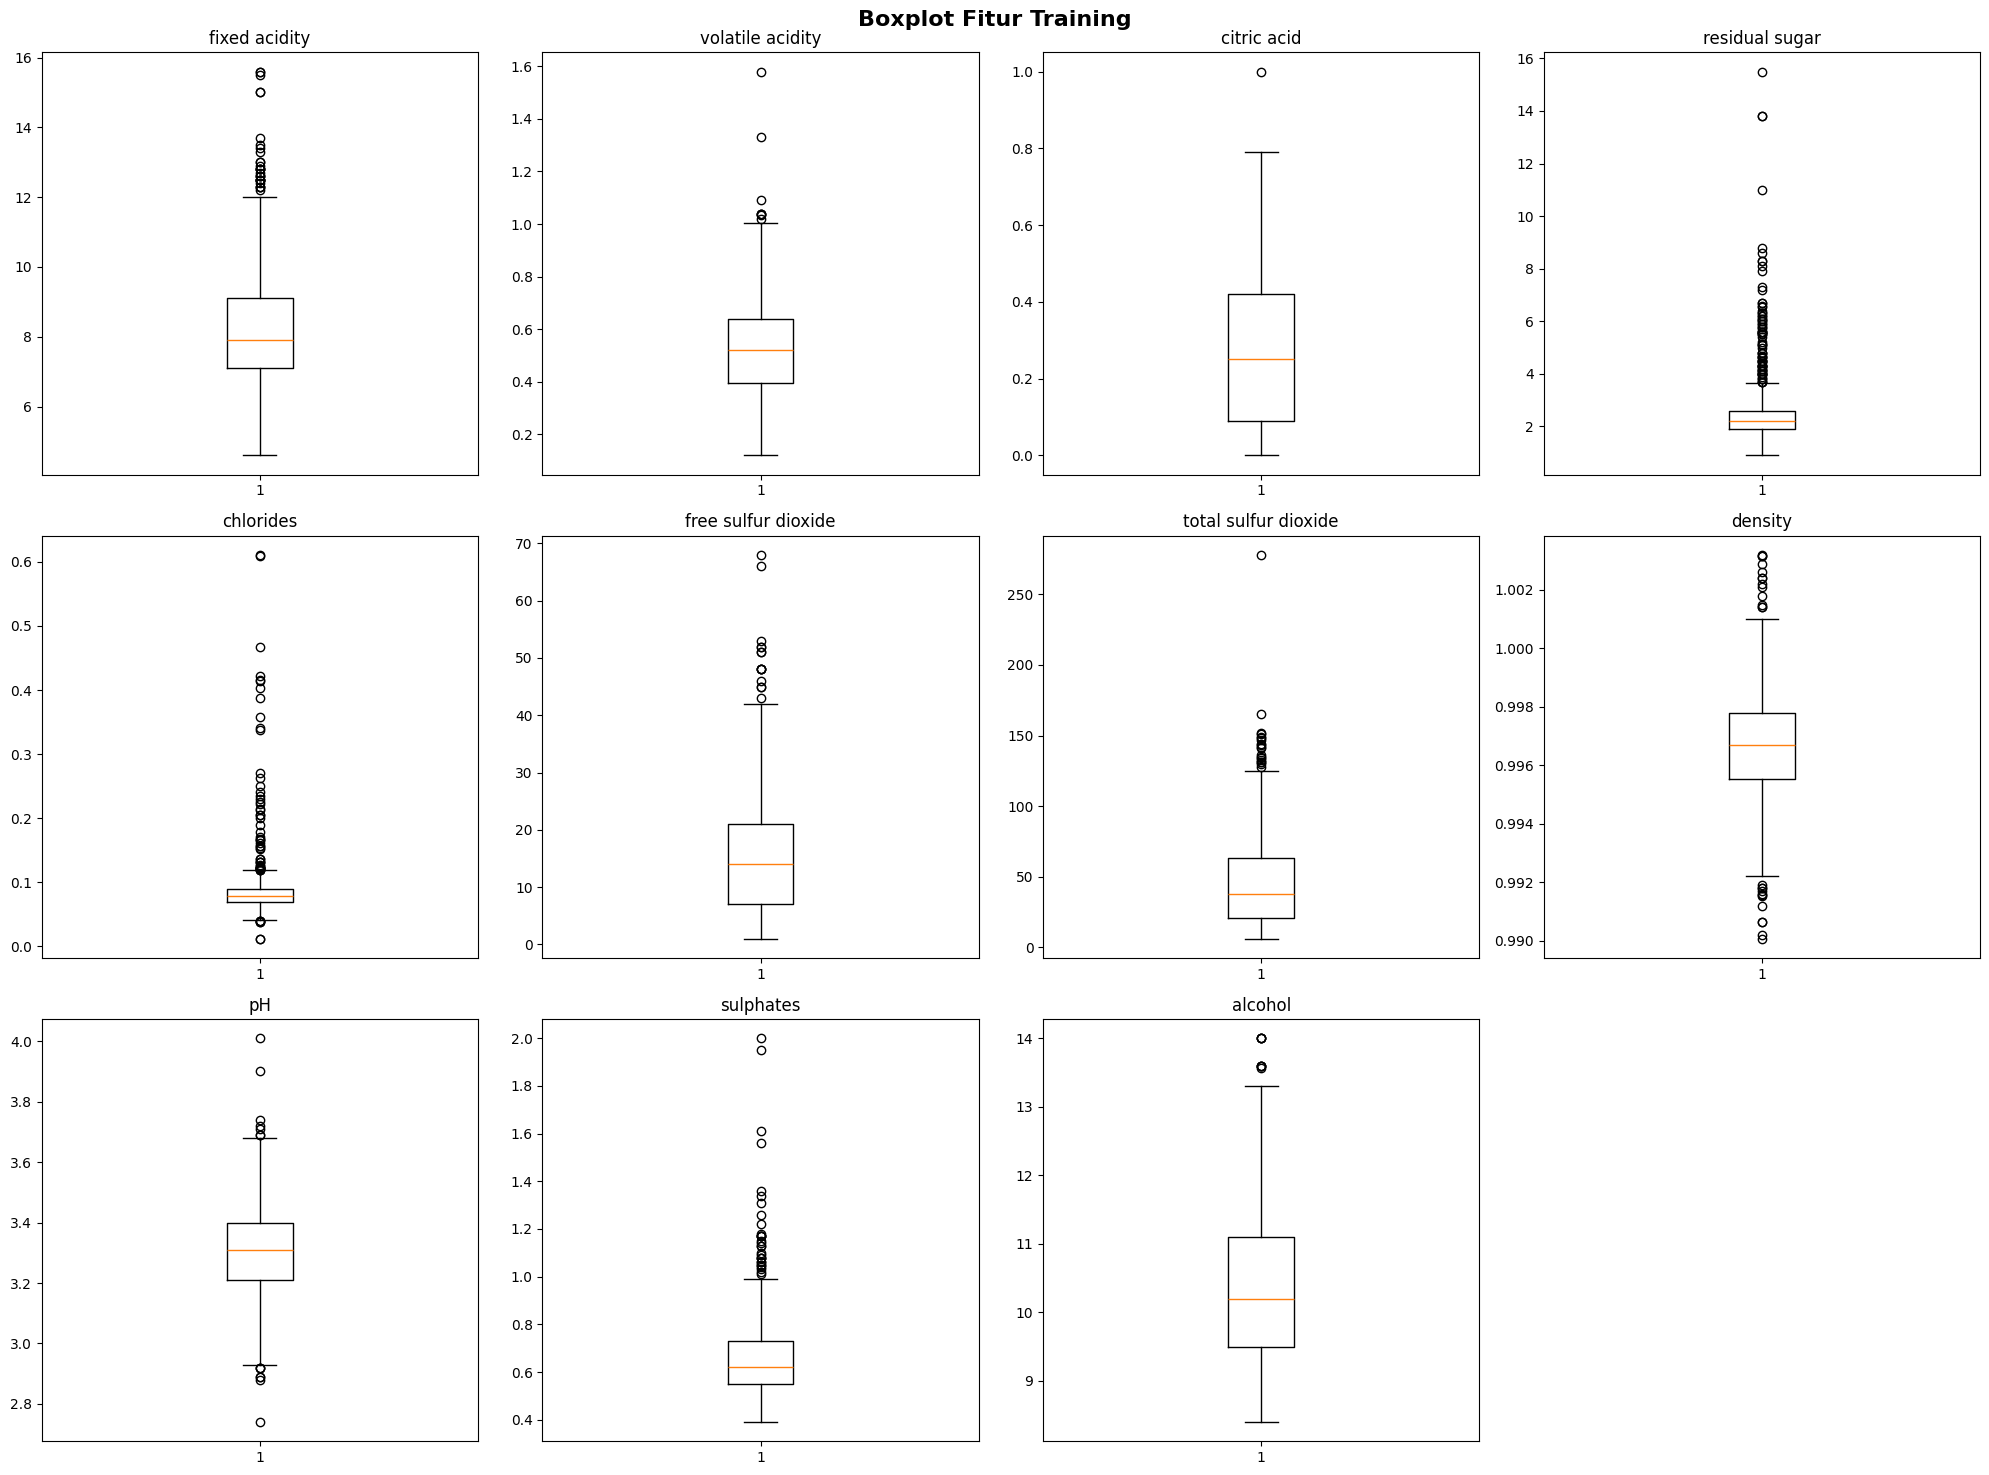

Jumlah outlier tiap fitur:
fixed acidity           30
volatile acidity         8
citric acid              1
residual sugar          76
chlorides               59
free sulfur dioxide     15
total sulfur dioxide    19
density                 25
pH                      14
sulphates               31
alcohol                  9
quality                 19
Id                       0
dtype: int64


In [193]:
#visualisasi boxplot untuk melihat skala fitur
num_cols = X_train.columns.tolist()
print("Boxplot Fitur Training:")
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot Fitur Training", fontsize=16, fontweight='bold')
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

#cek outlier
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Jumlah outlier tiap fitur:")
outlier_count = ((df_train < lower_bound) | (df_train > upper_bound)).sum()
print(outlier_count)

 Dari pengecekan outlier diatas terlihat bahwa fitur residual sugar dan chlorides memeiliki jumlah outlier tertinggi. Fitur seperti fixed acidity, sulphates, dan density juga memiliki jumlah outlier cukup banyak. Sementara itu, fitur citric acid dan volatile acidity dengan sedikit outlier. Karena sebaran datanya tidak seragam dan beberapa fitur memiliki rentang nilai yang jauh berbeda, maka scaling perlu dilakukan agar distribusi setiap fitur menjadi lebih seragam sebelum proses pelatihan model dilakukan.


Statistik deskriptif setelah scaling:
       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   8.570000e+02      8.570000e+02  8.570000e+02    8.570000e+02   
mean    2.922594e-16     -2.280038e-16  1.057109e-16   -8.291047e-17   
std     1.000584e+00      1.000584e+00  1.000584e+00    1.000584e+00   
min    -2.152830e+00     -2.286383e+00 -1.370820e+00   -1.242448e+00   
25%    -6.831049e-01     -7.505604e-01 -9.093531e-01   -4.689080e-01   
50%    -2.127929e-01     -5.245940e-02 -8.896691e-02   -2.368459e-01   
75%     4.926752e-01      6.177176e-01  7.826934e-01    7.257017e-02   
max     4.313960e+00      5.867437e+00  3.756593e+00    1.005124e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  8.570000e+02         8.570000e+02          8.570000e+02  8.570000e+02   
mean   2.259310e-16         2.280038e-17         -3.938247e-17  4.875136e-14   
std    1.000584e+00         1.000584e+00          1.000584e+00  1.000584

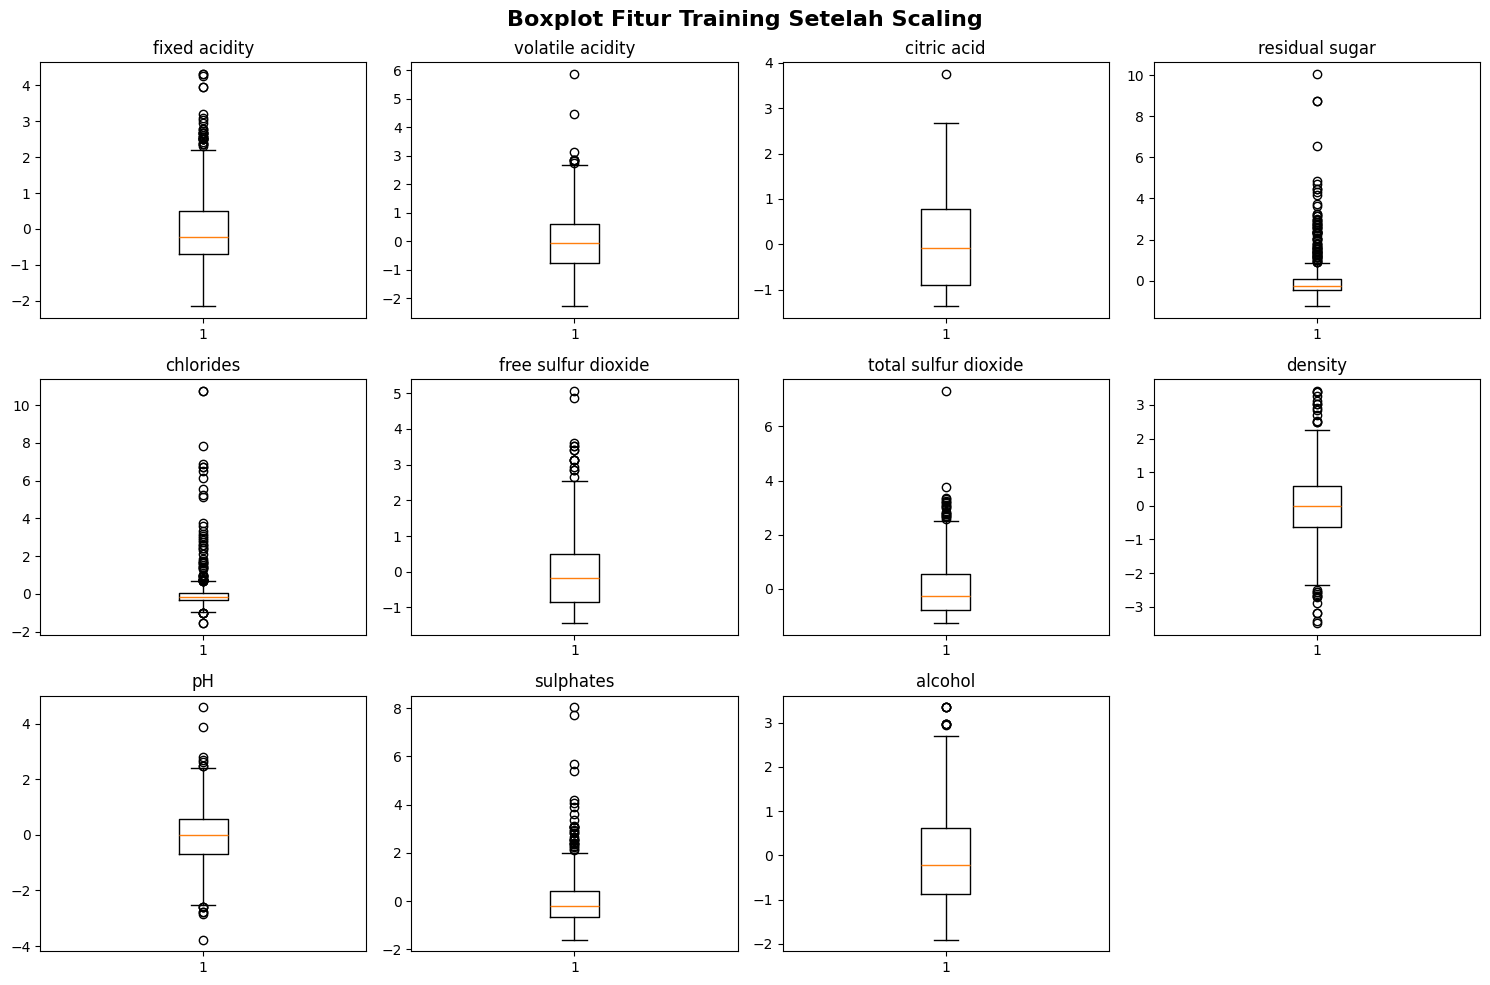

In [194]:
#feature scaling dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#konversi ke dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\nStatistik deskriptif setelah scaling:")
print(X_train_scaled.describe())

#bloxplot setelah scaling
num_cols = X_train_scaled.columns.tolist()
print("\nBoxplot Fitur Training Setelah Scaling:")
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot Fitur Training Setelah Scaling", fontsize=16, fontweight='bold')
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train_scaled[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

Setelah dilakukan scaling dengan StandardScaler, setiap variabel berada dalam skala yang sama sehingga tidak ada fitur yang mendominasi perhitungan model. Dari boxplot terlihat sebagian besar data terpusat di sekitar nol, dengan persebaran yang lebih seimbang antarfitur. Secara keseluruhan, data sudah siap digunakan untuk tahap pemodelan.

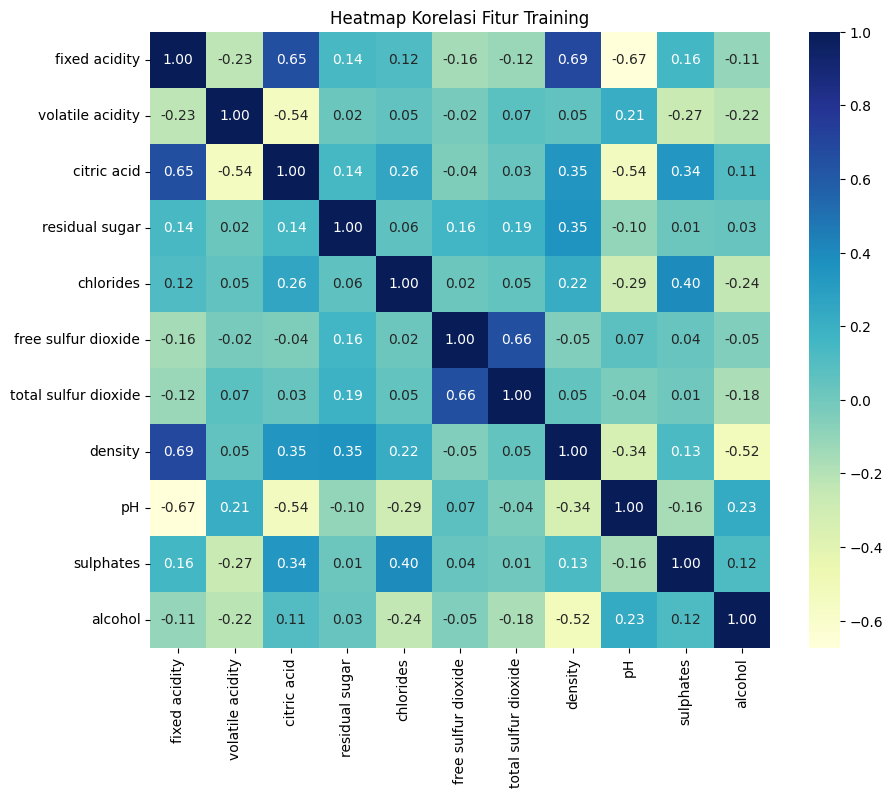

In [195]:
#hitung matriks korelasi
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Training')
plt.show()

Dari matriks korelasi di atas, terlihat bahwa korelasi tertinggi terdapat antara free sulfur dioxide dan total sulfur dioxide dengan nilai 0.66, yang menunjukkan hubungan positif kuat,dimanajika semakin tinggi kadar free sulfur dioxide, maka total sulfur dioxide juga cenderung meningkat. Selain itu, terdapat korelasi negatif kuat antara fixed acidity dan pH sebesar -0.67, menandakan bahwa semakin tinggi keasaman, pH akan semakin rendah. Berdasarkan hal ini, fitur-fitur seperti free sulfur dioxide, total sulfur dioxide, fixed acidity, dan pH berpotensi menjadi variabel penting yang memengaruhi kualitas wine.

**Pemodelan**

Pada tahap ini akan dilakukan pembangunan beberapa model. Terdapat lima metode yang akan digunakan, yaitu Logistic Regression, Naive Bayes,Random Forest, K-Nearest Neighbors (KNN), dan Decision Tree. Setiap model akan dilatih menggunakan data training, kemudian dievaluasi untuk menentukan metode yang memberikan hasil terbaik dalam memprediksi kualitas wine.

In [196]:
#matriks
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

#import library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,average_precision_score,roc_auc_score
from sklearn.metrics import r2_score

#seleksi model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

#import library Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

#import library Gaussian Naive Bayes
from sklearn import naive_bayes

#import library Random Forest
from sklearn.ensemble import RandomForestClassifier

#import library KNN
from sklearn.neighbors import KNeighborsClassifier

#import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

**Logistic Regression**

In [197]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=1000)
logreg.fit(X_train_scaled, y_train)
Y_predlr = logreg.predict(X_test_scaled)
acc_log = round(logreg.score(X_train_scaled, y_train) * 100, 2)
print('Akurasi data training dengan Logistic Regression: %.3f' % acc_log)

Akurasi data training dengan Logistic Regression: 61.380


Nilai akurasi dengan menggunakan model Logistic Regression sebesar 61.38% yang diamana menunjukkan bahwa model ini mampu mengklasifikasikan data training dengan tingkat ketepatan sedang.

**Naive Bayes**

In [198]:
gaussian = naive_bayes.GaussianNB()
gaussian.fit(X_train, y_train)
Y_prednb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print('Akurasi data training dengan Naive Bayes: %.3f' % acc_gaussian)

Akurasi data training dengan Naive Bayes: 55.540


Akurasi dengan model Naive Bayes yang relatif rendah yaitu sebesar 55.54% menunjukkan bahwa asumsi independensi antar fitur tidak terpenuhi dalam dataset ini.

**Random Forest**

In [199]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predrf = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('Akurasi data training dengan Random Forest: %.3f' % acc_random_forest)

Akurasi data training dengan Random Forest: 100.000


Nilai akurasi dengan Random Forest sebesar 100% pada data training menunjukkan bahwa model ini sangat baik dalam menyesuaikan diri dengan data latih.

**KNN**

In [200]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
Y_predknn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print('Akurasi data training dengan KNN: %.3f' % acc_knn)

Akurasi data training dengan KNN: 100.000


Nilai akurasi dengan K-Nearest Neighbors (KNN) sebesar 100% pada data training menunjukkan bahwa model ini sangat baik dalam menyesuaikan diri dengan data latih.

**Decision Tree**

In [201]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_preddt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('Akurasi data training dengan Decision Tree: %.3f' % acc_decision_tree)

Akurasi data training dengan Decision Tree: 100.000


Nilai akurasi dengan Decision Tree sebesar 100% pada data training menunjukkan bahwa model ini sangat baik dalam menyesuaikan diri dengan data latih.

In [202]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Naive Bayes',
              'Random Forest',
              'KNN',
              'Decision Tree'],
    'Score': [acc_log,
              acc_gaussian,
              acc_random_forest,
              acc_knn,
              acc_decision_tree],
    'accuracy_score':[acc_log,
                      acc_gaussian,
                      acc_random_forest,
                      acc_knn,
                      acc_decision_tree]})
result_df = results.sort_values(by='accuracy_score', ascending=False)
result_df_20 = result_df.reset_index(drop=True)
result_df_20.head(9)

,Model,Score,accuracy_score
0,Random Forest,100.00,100.00
1,Decision Tree,100.00,100.00
2,KNN,100.00,100.00
3,Logistic Regression,61.38,61.38
4,Naive Bayes,55.54,55.54


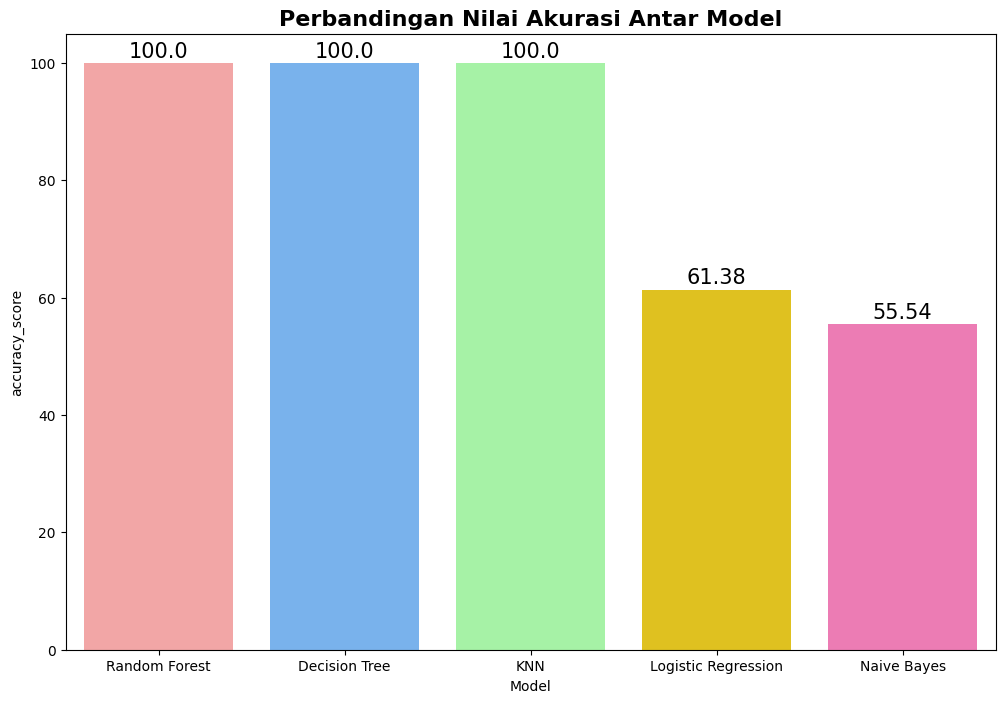

In [203]:
plt.subplots(figsize=(12,8))
ax = sns.barplot(
    x='Model',
    y='accuracy_score',
    hue='Model',
    data=result_df_20,
    palette=['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF69B4'] )
labels = result_df_20["accuracy_score"]
for i, v in enumerate(labels):
    ax.text(i, v + 1, str(v), horizontalalignment='center', size=15, color='black')
plt.title("Perbandingan Nilai Akurasi Antar Model", fontsize=16, weight='bold')
plt.show()

Hasil akurasi yang terbaik dari visualisasi dengan bar chart adalah klasifikasi menggunakan model Random Forest, KNN, dan Decision Tree yang dimana nilai akurasinya sebesar 100%.

Akurasi pada data training: 1.00

Confusion Matrix:
[[  6   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 362   0   0   0]
 [  0   0   0 341   0   0]
 [  0   0   0   0 109   0]
 [  0   0   0   0   0  13]]


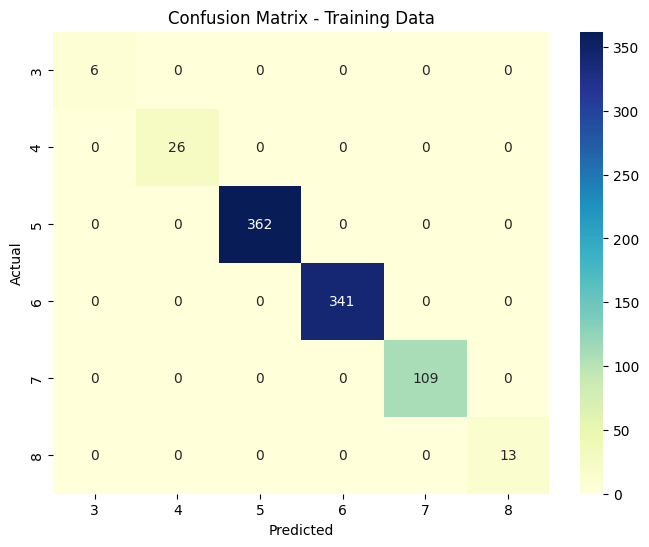


Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       362
           6       1.00      1.00      1.00       341
           7       1.00      1.00      1.00       109
           8       1.00      1.00      1.00        13

    accuracy                           1.00       857
   macro avg       1.00      1.00      1.00       857
weighted avg       1.00      1.00      1.00       857



In [204]:
#pilih dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#evaluasi model pada data training
y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Akurasi pada data training: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

Dari tiga model dengan akurasi 100% yaitu Random Forest, Decision Tree, KNN, dipilih Random Forest secara acak. Model ini memiliki akurasi 1.00 pada 857 data, dengan precision, recall, dan F1-score semua 1.00, artinya semua prediksi pada data training benar.

In [205]:
#simpan model
import joblib
joblib.dump(model, 'wine_quality_model.pkl')
print("\nModel disimpan sebagai 'wine_quality_model.pkl'")


Model disimpan sebagai 'wine_quality_model.pkl'


**PREDIKSI DATA TEST**

In [206]:
#prediksi pada data testing
y_test_pred = model.predict(X_test_scaled)
result_df = pd.DataFrame({
    'Id': test_ids,
    'quality': y_test_pred
})
print("Hasil prediksi (5 baris pertama):")
print(result_df.head())

#simpan ke file CSV
result_df.to_csv('hasilprediksi_042.csv', index=False)
print("\nFile 'hasilprediksi_042.csv' berhasil disimpan.")

Hasil prediksi (5 baris pertama):
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        5

File 'hasilprediksi_042.csv' berhasil disimpan.
